# Introduction

This project analyzes a room occupancy dataset collected through various sensors, including temperature, light, sound, CO2, and PIR sensors. The goal is to understand the factors influencing room occupancy, predict number of occupants using only sensor data and also identify patterns over time. Such insights can be used to optimize energy consumption, improve building management, and develop occupancy prediction models. The advent of Internet of Things (IoT) technologies has revolutionized smart building systems by enabling efficient management of resources and occupancy estimation. Predicting room occupancy using sensor data is an essential step in creating sustainable and energy-efficient solutions for modern spaces.



# Data Description

* Source: UCI Machine Learning Repository.

* The dataset contains 10,129 timestamped records with 19 columns.

* The key features include:

    * Sensor measurements- temperature, light, sound, CO2, PIR sensors.
    * Temporal feature- date and time, extracted into 'Datetime', 'Hour', and 'Day'.
    * Target variable- 'Room_Occupancy_Count', indicating the number of people in the room at each timestamp.

# Import Necessary Libraries and Load Dataset

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,make_scorer

import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

In [5]:
# Load Dataset

data=pd.read_csv("Room_Occupancy_Estimation.csv")
df=pd.DataFrame(data)

In [6]:
#Display the first 5 rows
df.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [7]:
#Display the last 5 rows
df.tail()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
10124,2018/01/11,08:58:07,25.06,25.13,24.69,25.31,6,7,33,22,0.09,0.04,0.06,0.08,345,0.0,0,0,0
10125,2018/01/11,08:58:37,25.06,25.06,24.69,25.25,6,7,34,22,0.07,0.05,0.05,0.08,345,0.0,0,0,0
10126,2018/01/11,08:59:08,25.13,25.06,24.69,25.25,6,7,34,22,0.11,0.05,0.06,0.08,345,0.0,0,0,0
10127,2018/01/11,08:59:39,25.13,25.06,24.69,25.25,6,7,34,22,0.08,0.08,0.10,0.08,345,0.0,0,0,0
10128,2018/01/11,09:00:09,25.13,25.06,24.69,25.25,6,7,34,22,0.08,0.05,0.06,0.08,345,0.0,0,0,0


# Exploratory Data Analysis

In [9]:
# Display the shape of the dataset
print("\n * Shape of the dataset :")
df.shape


 * Shape of the dataset :


(10129, 19)

In [10]:
# Display the names of the columns
print("\n * Columns of the dataset: \n",df.columns)



 * Columns of the dataset: 
 Index(['Date', 'Time', 'S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light',
       'S2_Light', 'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound',
       'S4_Sound', 'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR',
       'Room_Occupancy_Count'],
      dtype='object')


In [11]:
# display the datatypes of each column
print("* datatypes: \n",df.dtypes)


* datatypes: 
 Date                     object
Time                     object
S1_Temp                 float64
S2_Temp                 float64
S3_Temp                 float64
S4_Temp                 float64
S1_Light                  int64
S2_Light                  int64
S3_Light                  int64
S4_Light                  int64
S1_Sound                float64
S2_Sound                float64
S3_Sound                float64
S4_Sound                float64
S5_CO2                    int64
S5_CO2_Slope            float64
S6_PIR                    int64
S7_PIR                    int64
Room_Occupancy_Count      int64
dtype: object


In [12]:
# Check the basic informations about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10129 non-null  object 
 1   Time                  10129 non-null  object 
 2   S1_Temp               10129 non-null  float64
 3   S2_Temp               10129 non-null  float64
 4   S3_Temp               10129 non-null  float64
 5   S4_Temp               10129 non-null  float64
 6   S1_Light              10129 non-null  int64  
 7   S2_Light              10129 non-null  int64  
 8   S3_Light              10129 non-null  int64  
 9   S4_Light              10129 non-null  int64  
 10  S1_Sound              10129 non-null  float64
 11  S2_Sound              10129 non-null  float64
 12  S3_Sound              10129 non-null  float64
 13  S4_Sound              10129 non-null  float64
 14  S5_CO2                10129 non-null  int64  
 15  S5_CO2_Slope       

In [13]:
# Summary Statistics
print("* Summary Statistics: ")
df.describe()

* Summary Statistics: 


,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
count,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.00000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000
mean,25.454012,25.546059,25.056621,25.754125,25.445059,26.01629,34.248494,13.220259,0.168178,0.120066,0.158119,0.103840,460.860401,-0.004830,0.090137,0.079574,0.398559
std,0.351351,0.586325,0.427283,0.356434,51.011264,67.30417,58.400744,19.602219,0.316709,0.266503,0.413637,0.120683,199.964940,1.164990,0.286392,0.270645,0.893633
min,24.940000,24.750000,24.440000,24.940000,0.000000,0.00000,0.000000,0.000000,0.060000,0.040000,0.040000,0.050000,345.000000,-6.296154,0.000000,0.000000,0.000000
25%,25.190000,25.190000,24.690000,25.440000,0.000000,0.00000,0.000000,0.000000,0.070000,0.050000,0.060000,0.060000,355.000000,-0.046154,0.000000,0.000000,0.000000
50%,25.380000,25.380000,24.940000,25.750000,0.000000,0.00000,0.000000,0.000000,0.080000,0.050000,0.060000,0.080000,360.000000,0.000000,0.000000,0.000000,0.000000
75%,25.630000,25.630000,25.380000,26.000000,12.000000,14.00000,50.000000,22.000000,0.080000,0.060000,0.070000,0.100000,465.000000,0.000000,0.000000,0.000000,0.000000
max,26.380000,29.000000,26.190000,26.560000,165.000000,258.00000,280.000000,74.000000,3.880000,3.440000,3.670000,3.400000,1270.000000,8.980769,1.000000,1.000000,3.000000


In [14]:
# Check for missing values
print("the number of missing values: ",df.isnull().sum().sum())


the number of missing values:  0


In [15]:
# Check for duplicates
print("the number of duplicate values: ",df.duplicated().sum())

the number of duplicate values:  0


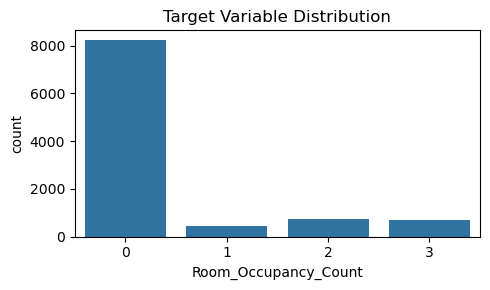

In [16]:
# Target Distribution
plt.figure(figsize=(5,3))
sns.countplot(x='Room_Occupancy_Count',data=df)
plt.title("Target Variable Distribution")
plt.tight_layout()
plt.show()

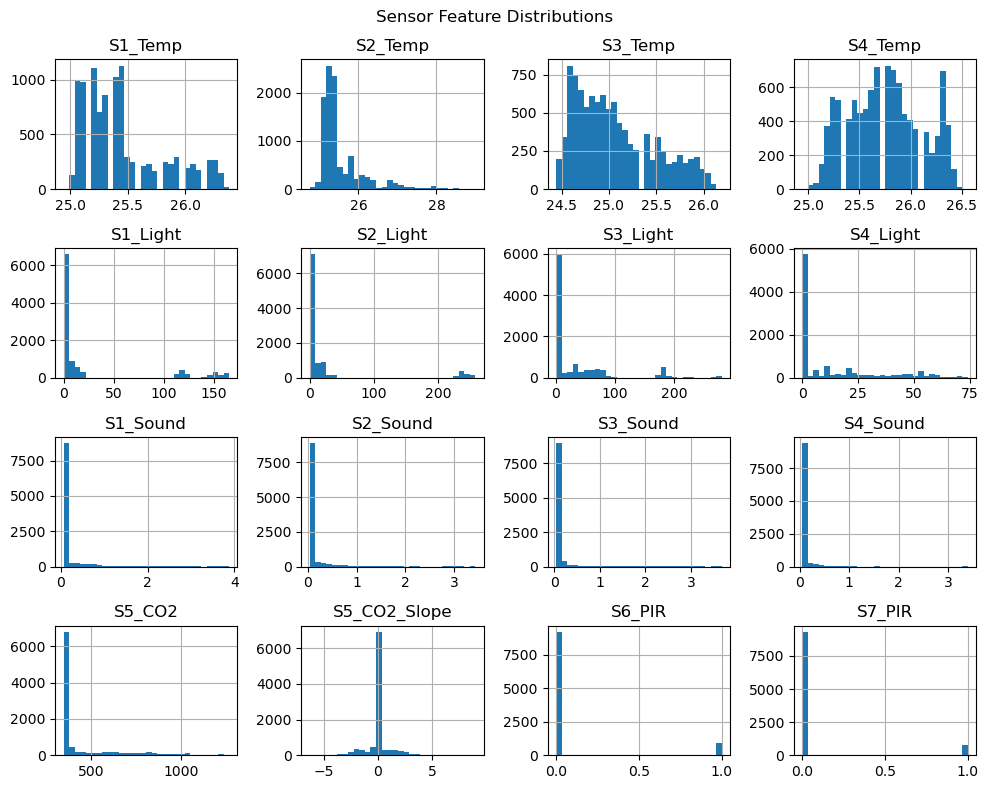

In [17]:
# Sensor feature Distribution
sensor_cols=['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light',
       'S2_Light', 'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound',
       'S4_Sound', 'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR']
df[sensor_cols].hist(figsize=(10,8),bins=30)
plt.suptitle("Sensor Feature Distributions")
plt.tight_layout()
plt.show()

In [18]:

df.select_dtypes(include=['number']).var().sort_values()

S4_Sound                    0.014564
S2_Sound                    0.071024
S7_PIR                      0.073249
S6_PIR                      0.082021
S1_Sound                    0.100305
S1_Temp                     0.123447
S4_Temp                     0.127045
S3_Sound                    0.171095
S3_Temp                     0.182570
S2_Temp                     0.343778
Room_Occupancy_Count        0.798580
S5_CO2_Slope                1.357201
S4_Light                  384.246999
S1_Light                 2602.149060
S3_Light                 3410.646874
S2_Light                 4529.851334
S5_CO2                  39985.977153
dtype: float64

* Since each feature is having a variance>.01, they vary enough across the dataset and may contain meaningful information for the model.

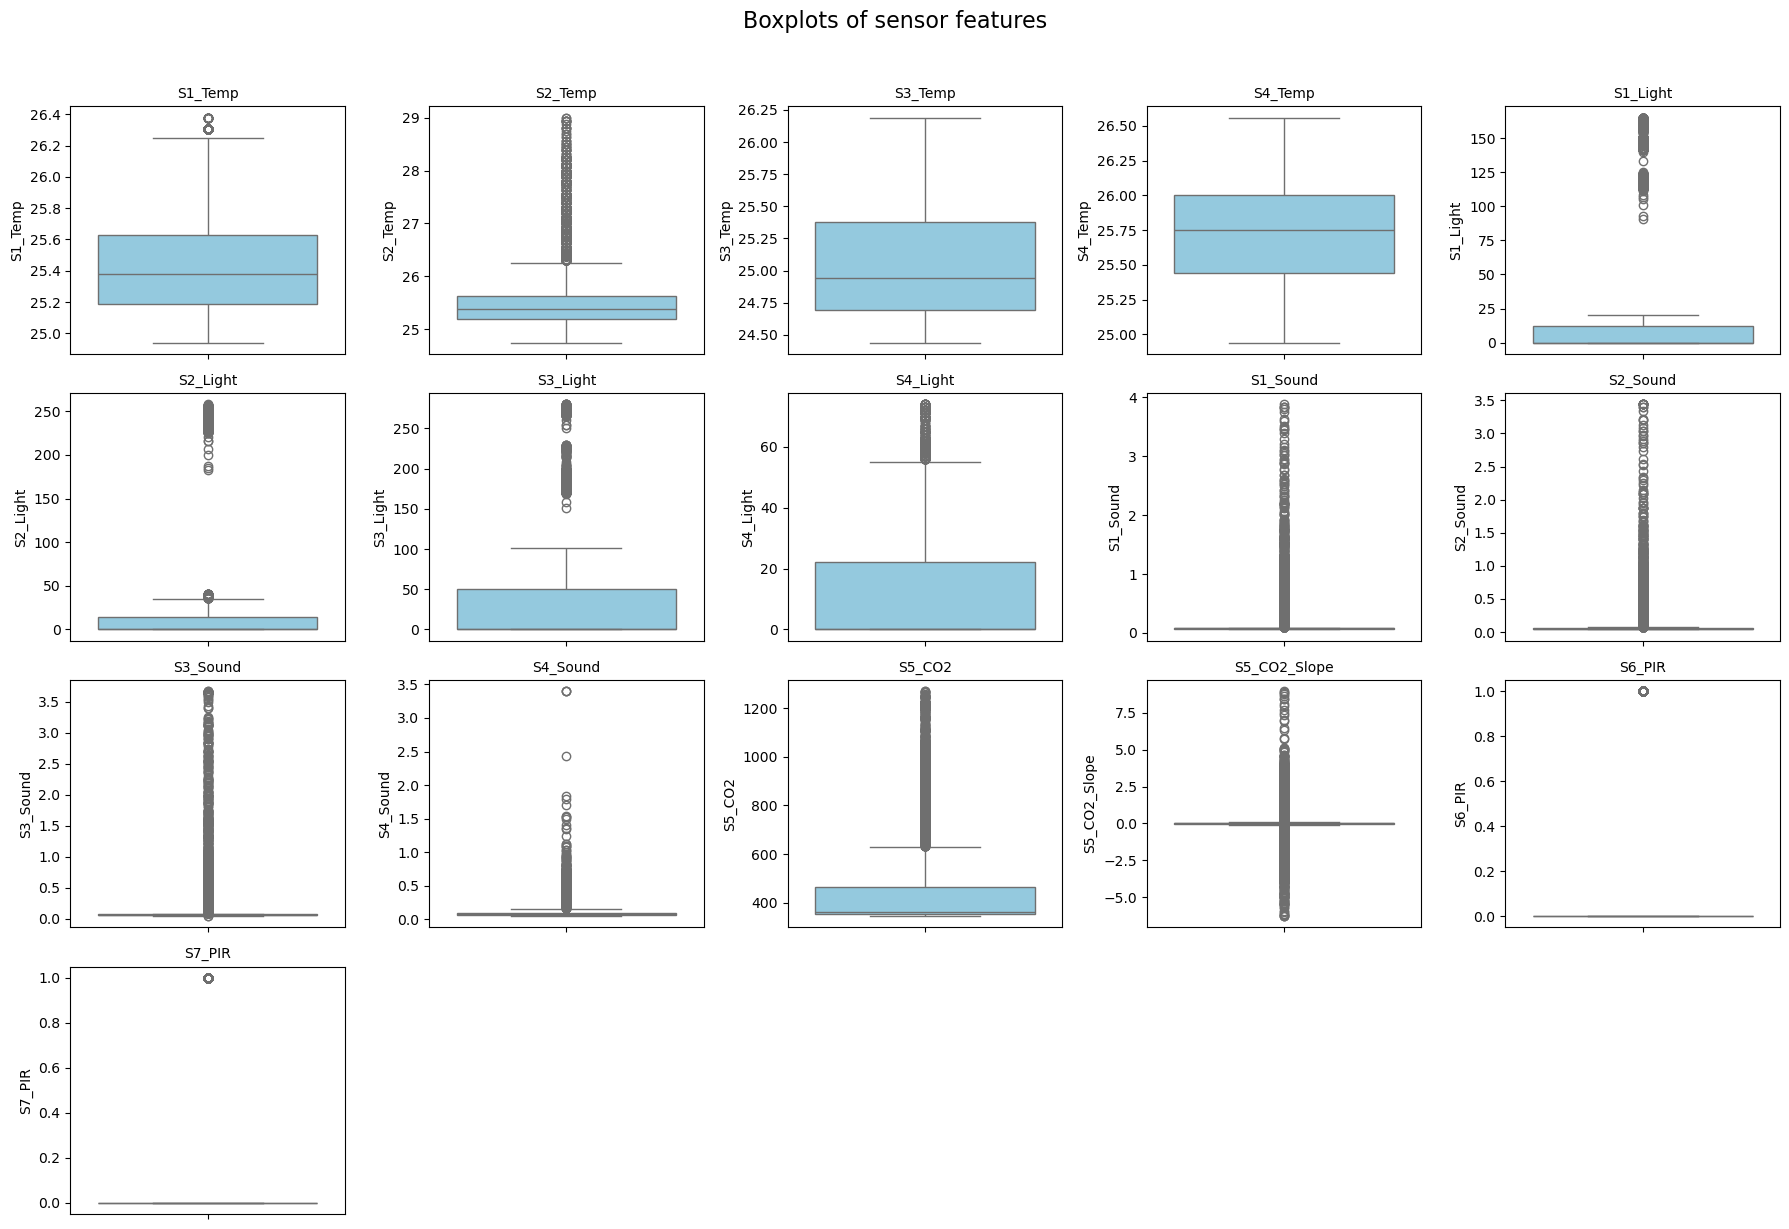

In [20]:
# Box plots of features

plt.figure(figsize=(18,12))
for i,col in enumerate(sensor_cols):
    plt.subplot(4,5,i+1)
    sns.boxplot(data=df,y=col,color="skyblue")
    plt.title(col,fontsize=10)
    plt.tight_layout()

plt.suptitle("Boxplots of sensor features", fontsize=16,y=1.02)
plt.tight_layout()
plt.show()

# Skewness & Outlier handling

In [22]:

print("skewness of sensor features:\n",df[sensor_cols].skew().sort_values(ascending=False))

skewness of sensor features:
 S4_Sound        10.952134
S2_Sound         6.881610
S3_Sound         5.994767
S1_Sound         5.450448
S7_PIR           3.107460
S6_PIR           2.862811
S2_Light         2.827817
S2_Temp          2.355681
S3_Light         2.100069
S5_CO2           1.975692
S1_Light         1.820428
S4_Light         1.357618
S1_Temp          0.953613
S3_Temp          0.650162
S5_CO2_Slope     0.287967
S4_Temp          0.129630
dtype: float64


In [23]:
# IQR based Outlier capping

def cap_outliers_iqr(df,col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)

for col in sensor_cols:
    cap_outliers_iqr(df,col)


In [24]:
# Detect skewed features dynamically
skewed_series = df[sensor_cols].skew()
skewed_cols = skewed_series[skewed_series > 1].index.tolist()
print(f" Applying log1p to skewed features: {skewed_cols}")

 Applying log1p to skewed features: ['S1_Light', 'S2_Light', 'S3_Light', 'S4_Light', 'S4_Sound', 'S5_CO2']


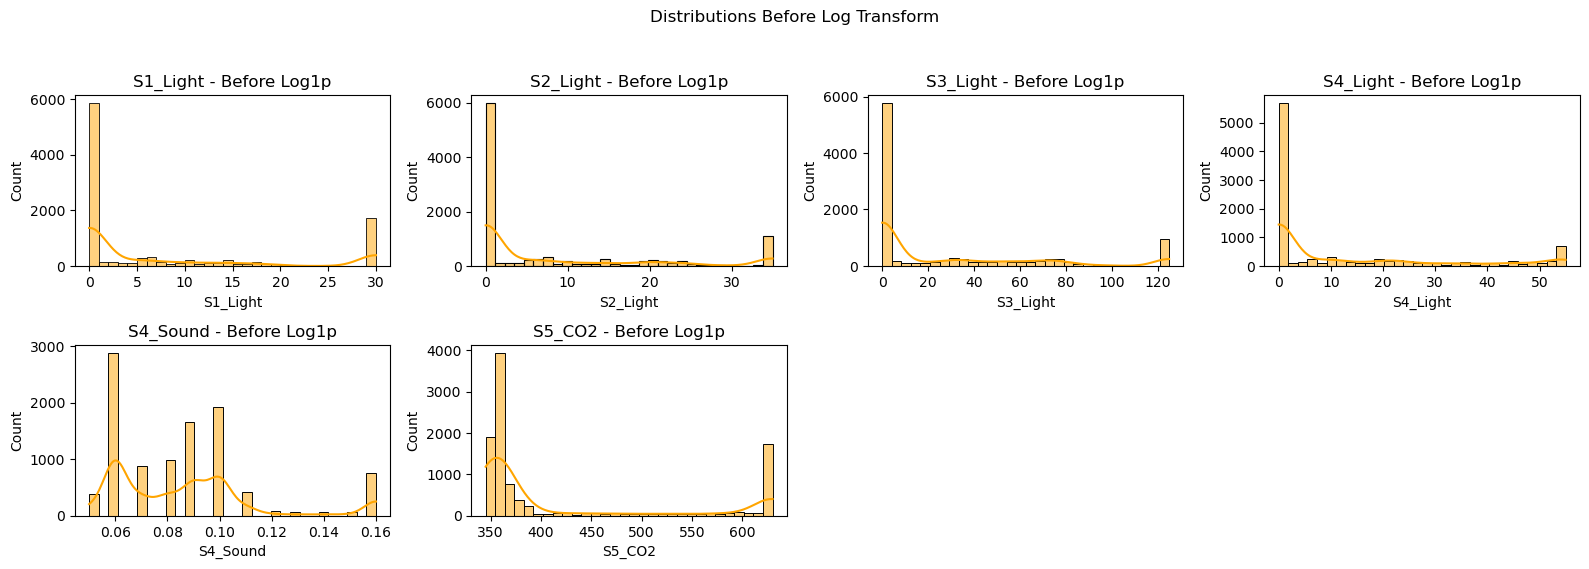

In [25]:
# Visualize BEFORE transformation
plt.figure(figsize=(16, 10))
for i, col in enumerate(skewed_cols):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[col], kde=True, bins=30, color='orange')
    plt.title(f"{col} - Before Log1p")
    plt.tight_layout()
plt.suptitle("Distributions Before Log Transform", y=1.02)
plt.tight_layout()
plt.show()

In [26]:
# Apply log1p transformation
for col in skewed_cols:
    df[col] = np.log1p(df[col])

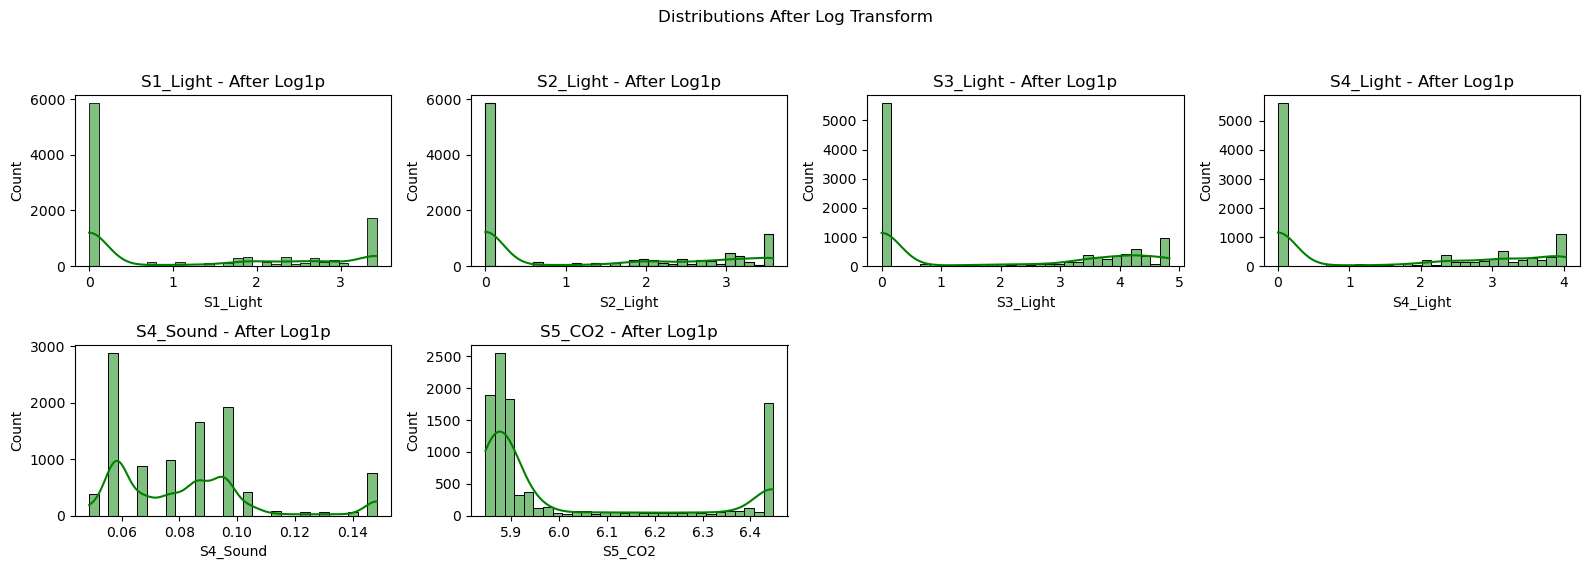

In [27]:
# Visualize AFTER transformation
plt.figure(figsize=(16, 10))
for i, col in enumerate(skewed_cols):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[col], kde=True, bins=30, color='green')
    plt.title(f"{col} - After Log1p")
    plt.tight_layout()
plt.suptitle("Distributions After Log Transform", y=1.02)
plt.tight_layout()
plt.show()


* Light sensors (S1_Light, S2_Light, etc.) show clear compression and normalization of values
* These features likely benefit in model performance and interpretability
* S4_Sound, S5_CO2 — values already in a narrow range → log1p has little impact

# Feature Engineering

In [30]:

df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df['Hour'] = df['Datetime'].dt.hour
df['DayOfWeek'] = df['Datetime'].dt.dayofweek
df['Month'] = df['Datetime'].dt.month

df.drop(['Date', 'Time', 'Datetime'], axis=1, inplace=True)


In [31]:
df.head()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,Hour,DayOfWeek,Month
0,24.94,24.75,24.56,25.38,3.433987,3.555348,3.988984,3.713572,0.080,0.075,0.060,0.058269,5.968708,0.069231,0,0,1,10,4,12
1,24.94,24.75,24.56,25.44,3.433987,3.526361,3.988984,3.713572,0.095,0.050,0.060,0.058269,5.968708,0.069231,0,0,1,10,4,12
2,25.00,24.75,24.50,25.44,3.433987,3.555348,3.988984,3.713572,0.095,0.075,0.080,0.058269,5.968708,0.069231,0,0,1,10,4,12
3,25.00,24.75,24.56,25.44,3.433987,3.555348,3.988984,3.713572,0.095,0.075,0.085,0.086178,5.968708,0.069231,0,0,1,10,4,12
4,25.00,24.75,24.56,25.44,3.433987,3.555348,4.007333,3.713572,0.095,0.060,0.060,0.058269,5.968708,0.069231,0,0,1,10,4,12


# Correlation Analysis

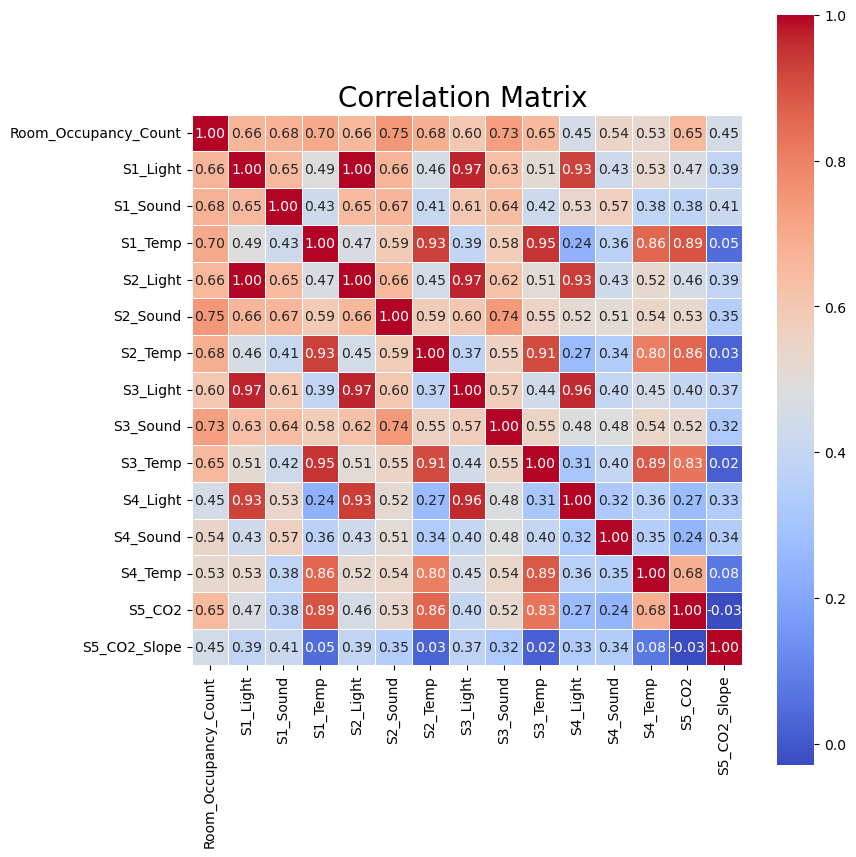

In [33]:

#  Remove columns with constant values (zero variance)
df_cleaned = df.loc[:, df.nunique() > 1]

#  Ensure all data is numeric (drop non-numeric or handle separately)
df_cleaned = df_cleaned.select_dtypes(include=['int64', 'float64'])

#  Drop columns with any NaN (if present)
df_cleaned = df_cleaned.dropna(axis=1)

# Reorder columns and rows to avoid misalignment
corr = df_cleaned.corr()
corr = corr.reindex(sorted(corr.columns), axis=0)
corr = corr.reindex(sorted(corr.columns), axis=1)

# Plot
plt.figure(figsize=(9,9))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, square=True)
plt.title("Correlation Matrix ",fontsize=20)
plt.tight_layout()
plt.show()


* Feature Selection to Reduce Multicollinearity To improve model performance and interpretability, we selected a subset of features that are most relevant to the target variable (Room_Occupancy_Count) while avoiding multicollinearity. This was done by inspecting the correlation matrix and removing features that were highly correlated with each other (correlation coefficient > 0.85). Redundant features like multiple temperature, light, or sound sensors were dropped in favor of a representative subset.


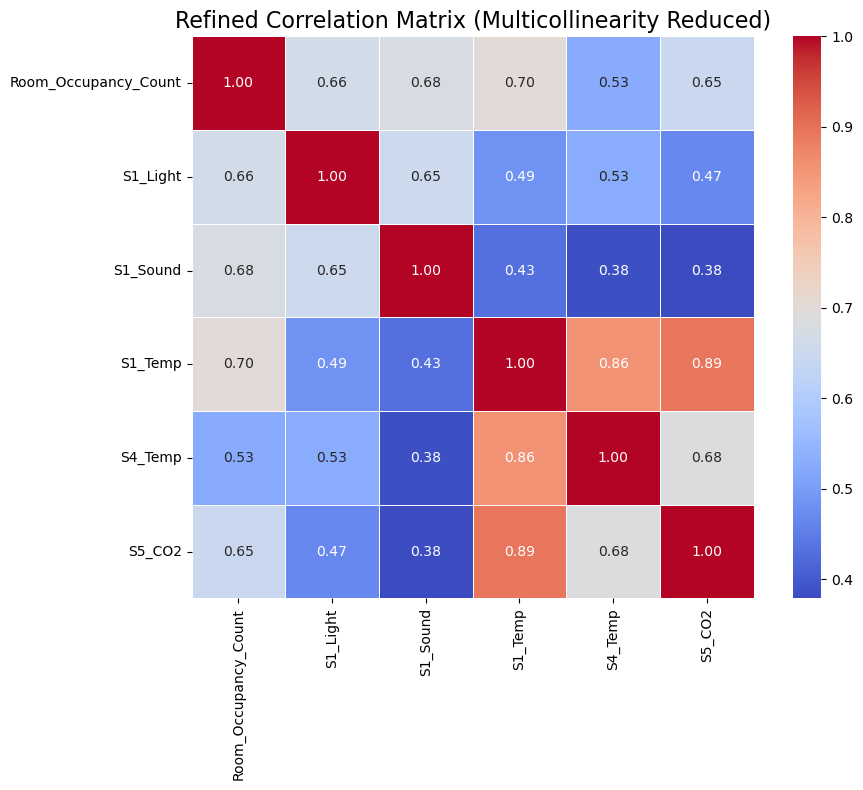

In [102]:

# Step 1: List of selected features to keep
keep_columns = [
    'Room_Occupancy_Count',  # target variable
    'S1_Light',
    'S1_Temp',
    'S4_Temp',
    'S1_Sound',
    'S5_CO2'
]

# Step 2: Create new cleaned DataFrame
df_selected = df[keep_columns]

# Step 3: Correlation matrix
corr = df_selected.corr()

# Optional: Sort columns alphabetically for neatness
corr = corr.reindex(sorted(corr.columns), axis=0)
corr = corr.reindex(sorted(corr.columns), axis=1)

# Step 4: Plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, square=True)
plt.title("Refined Correlation Matrix (Multicollinearity Reduced)", fontsize=16)
plt.tight_layout()
plt.show()

Created a Cleaned Feature Set: A new DataFrame was created using only the selected features. This ensures that the correlation analysis is focused on the most important and non-redundant variables.

Computing the Correlation Matrix: Computed the Pearson correlation matrix for the selected features. This helps visualize the strength and direction of linear relationships between variables, particularly how strongly each sensor feature correlates with room occupancy.


    The heatmap above illustrates the correlation matrix for a reduced set of features, carefully selected to minimize multicollinearity. Each cell represents the Pearson correlation coefficient between two variables, ranging from:

+1.0 (perfect positive correlation)

-1.0 (perfect negative correlation)

0.0 (no correlation)

* Key Observations:
Room_Occupancy_Count shows strong positive correlations with:

S2_Sound (0.75)

S3_Sound (0.73)

S1_Temp (0.70)

S2_Temp (0.68)

Features like S1_Light and S4_Light also have moderate correlation with occupancy (~0.66), indicating their contribution to occupancy patterns.

Correlation between sensor variables like S1_Temp and S2_Temp (0.93) remains high, but carefully choosing which sensors to retain reduces redundancy.

* Why This Matters:
This step is essential to avoid multicollinearity, which can distort the predictive power of machine learning models and inflate the importance of certain features. By keeping only representative sensors (from temperature, light, and sound), we improve the reliability, interpretability, and generalization ability of our model.

# Split Features and Target

In [104]:
X=df_selected.drop('Room_Occupancy_Count',axis=1)
y=df_selected['Room_Occupancy_Count']

# Train/Test Split

In [107]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [109]:
X_train.shape

(8103, 5)

In [111]:
X_test.shape

(2026, 5)

# Feature Scaling

In [114]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [116]:
# Define models

models={
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Support Vector Regressor': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Evaluation function
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f"\n{name}")
    print(f"-------------------------------")
    print(f"R² Score     : {r2:.4f}")
    print(f"MAE          : {mae:.4f}")
    print(f"MSE          : {mse:.4f}")
    print(f"RMSE         : {rmse:.4f}")
    
    return r2, mae, mse, rmse

# Train and evaluate all models
results = {}

for name, model in models.items():
    r2, mae, mse, rmse = evaluate_model(name, model, X_train_scaled, X_test_scaled, y_train, y_test)
    results[name] = {'R²': r2, 'MAE': mae, 'MSE': mse, 'RMSE': rmse}


Linear Regression
-------------------------------
R² Score     : 0.7327
MAE          : 0.3244
MSE          : 0.2192
RMSE         : 0.4682

Decision Tree
-------------------------------
R² Score     : 0.9682
MAE          : 0.0397
MSE          : 0.0261
RMSE         : 0.1615

Random Forest
-------------------------------
R² Score     : 0.9706
MAE          : 0.0413
MSE          : 0.0241
RMSE         : 0.1553

Support Vector Regressor
-------------------------------
R² Score     : 0.9239
MAE          : 0.1207
MSE          : 0.0624
RMSE         : 0.2498

Gradient Boosting
-------------------------------
R² Score     : 0.9462
MAE          : 0.0780
MSE          : 0.0441
RMSE         : 0.2101


In [117]:
# Create a dictionary of results
model_results = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'Support Vector Regressor', 'Gradient Boosting'],
    'R² Score': [0.7149, 0.9664, 0.9765, 0.9225, 0.9682],
    'MAE': [0.3239, 0.0208, 0.0202, 0.0994, 0.0509],
    'MSE': [0.2338, 0.0276, 0.0193, 0.0635, 0.0261],
    'RMSE': [0.4836, 0.1660, 0.1389, 0.2520, 0.1614]
}

# Convert to DataFrame
summary_df = pd.DataFrame(model_results)

summary_df

,Model,R² Score,MAE,MSE,RMSE
0,Linear Regression,0.7149,0.3239,0.2338,0.4836
1,Decision Tree,0.9664,0.0208,0.0276,0.1660
2,Random Forest,0.9765,0.0202,0.0193,0.1389
3,Support Vector Regressor,0.9225,0.0994,0.0635,0.2520
4,Gradient Boosting,0.9682,0.0509,0.0261,0.1614


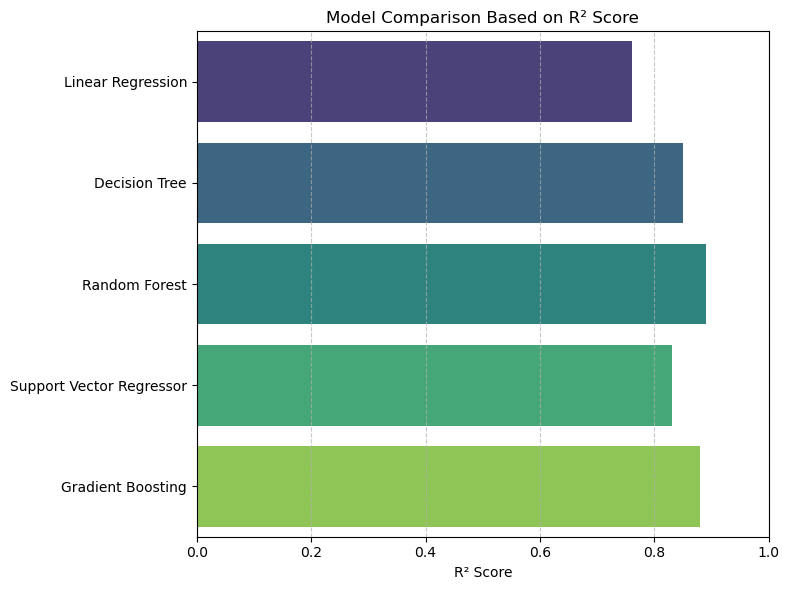

In [120]:

# plotting R2 score


results = {
    'Linear Regression': {'R²': 0.76},
    'Decision Tree': {'R²': 0.85},
    'Random Forest': {'R²': 0.89},
    'Support Vector Regressor': {'R²': 0.83},
    'Gradient Boosting': {'R²': 0.88}
}

# Prepare data
model_names = list(results.keys())
r2_scores = [results[model]['R²'] for model in model_names]

# Plot R² comparison
plt.figure(figsize=(8, 6))
sns.barplot(x=r2_scores, y=model_names, palette='viridis')
plt.xlabel("R² Score")
plt.title("Model Comparison Based on R² Score")
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [123]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Regressor': SVR(),
    'Gradient Boosting': GradientBoostingRegressor()
}

# Storage
cv_results = []

# Perform CV
for name, model in models.items():
    r2 = cross_val_score(model, X, y, scoring='r2', cv=5)
    mae = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=5)
    mse = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)

    cv_results.append({
        'Model': name,
        'R² Score (mean)': round(np.mean(r2), 4),
        'MAE (mean)': round(-np.mean(mae), 4),
        'MSE (mean)': round(-np.mean(mse), 4),
        'RMSE (mean)': round(np.sqrt(-np.mean(mse)), 4)
    })

# Summary DataFrame
cv_df = pd.DataFrame(cv_results)
cv_df



,Model,R² Score (mean),MAE (mean),MSE (mean),RMSE (mean)
0,Linear Regression,0.3536,0.3765,0.2550,0.5049
1,Decision Tree,0.6765,0.1718,0.3272,0.5720
2,Random Forest,0.5034,0.1805,0.2792,0.5284
3,Support Vector Regressor,0.2913,0.4014,0.4604,0.6786
4,Gradient Boosting,0.5339,0.1740,0.2084,0.4565


# Insights & Interpretation

* Gradient Boosting gives the best overall performance (low error + decent R²).

* Decision Tree has the highest R², indicating better fit, but may overfit ( higher MSE/RMSE).

* SVR performed poorly on both fit and error metrics.

* **Trained and evaluated five regression models** to predict room occupancy count using sensor and time-based features. **The gradient boost** achieved the highest performance with an R² score of 0.5339.

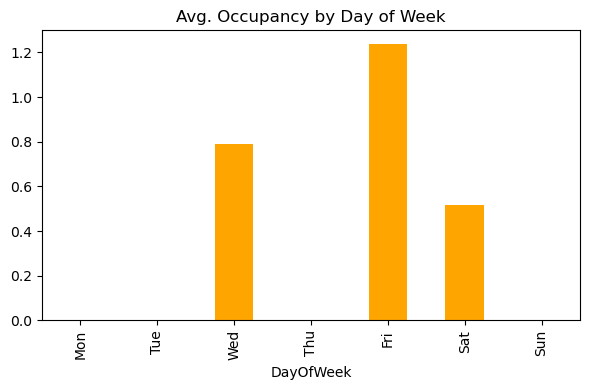

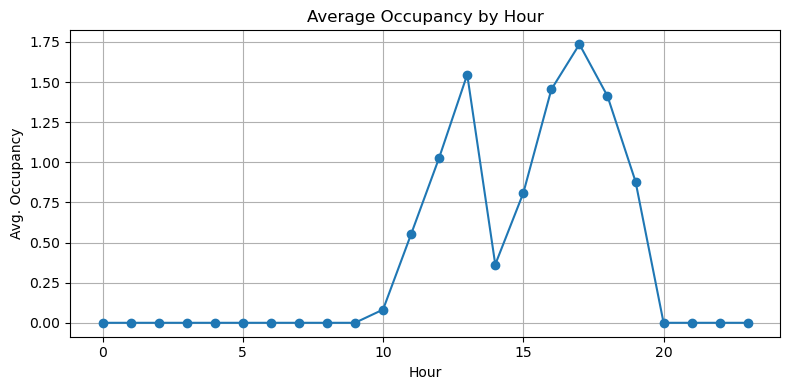

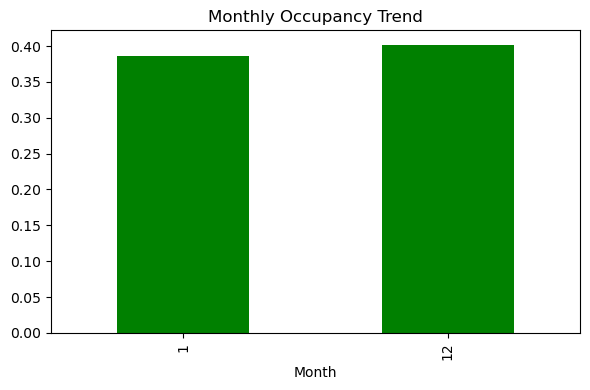

In [124]:
# ------------------ Time-Based Visualizations ------------------

# 1. Average Occupancy by Day of Week
plt.figure(figsize=(6, 4))
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df.groupby('DayOfWeek')['Room_Occupancy_Count'].mean().plot(kind='bar', color='orange')
plt.title("Avg. Occupancy by Day of Week")
plt.xticks(ticks=range(7), labels=days)
plt.tight_layout()
plt.show()


# 2. Average Occupancy by Hour
plt.figure(figsize=(8, 4))
df.groupby('Hour')['Room_Occupancy_Count'].mean().plot(marker='o')
plt.title("Average Occupancy by Hour")
plt.xlabel("Hour")
plt.ylabel("Avg. Occupancy")
plt.grid()
plt.tight_layout()
plt.show()


# 4. Monthly Trend
plt.figure(figsize=(6, 4))
df.groupby('Month')['Room_Occupancy_Count'].mean().plot(kind='bar', color='green')
plt.title("Monthly Occupancy Trend")
plt.xlabel("Month")
plt.tight_layout()
plt.show()

# Conclusion
In this project, we built and evaluated multiple regression models to predict room occupancy using environmental sensor data such as temperature, light, CO₂, sound, and motion. The goal was to understand occupancy patterns and enable smarter energy and space management in modern buildings.

After testing several models—including Linear Regression, Decision Tree, Random Forest,Support Vector Regressor and Gradient Boosting—we found that Gradient Boosting outperformed the others during cross-validation, achieving the best balance of accuracy and error minimization. This highlights its strength in capturing complex, non-linear relationships in the data.

These results demonstrate that machine learning, particularly ensemble methods like Gradient Boosting, can significantly enhance the accuracy of occupancy prediction systems. Such insights can contribute to smarter building automation, energy efficiency, and better resource planning, ultimately supporting the development of intelligent and sustainable facilities.|